In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eeg-mental-state-v2/training_matrix.csv


In [19]:
df=pd.read_csv('/kaggle/input/eeg-mental-state-v2/training_matrix.csv')
df.head()

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3,Label
0,25.781648,33.836367,-92.769629,19.187957,-1.542262,0.197462,-119.561133,2.032654,21.596272,33.965587,...,0.000230,0.000351,0.000547,0.000381,0.000350,0.000453,0.000442,0.000325,0.000209,2.0
1,29.357891,26.792566,417.203910,19.472121,-38.797263,-16.897194,-29.368531,-9.055370,44.647424,40.893307,...,0.001671,0.000740,0.001122,0.000521,0.000624,0.000439,0.001249,0.000727,0.000801,2.0
2,28.451926,31.076434,72.231301,14.245938,-13.225057,-0.614138,-28.331698,-8.858742,31.450289,30.692883,...,0.000748,0.000569,0.000327,0.000197,0.000833,0.000909,0.000699,0.001165,0.000616,2.0
3,21.282184,19.985184,16.220094,39.787312,1.847866,0.670216,-1.820355,20.220724,21.404679,20.777411,...,0.000990,0.005644,0.006891,0.010546,0.009583,0.011158,0.008853,0.004551,0.002287,1.0
4,20.431516,28.982168,27.540246,19.960398,2.491458,-6.020503,-1.071166,2.655259,16.295039,32.658163,...,0.001659,0.014379,0.014492,0.002949,0.004575,0.008305,0.007202,0.006957,0.009836,2.0


In [20]:
df.isna().any()

lag1_mean_0           False
lag1_mean_1           False
lag1_mean_2           False
lag1_mean_3           False
lag1_mean_d_h2h1_0    False
                      ...  
freq_720_3            False
freq_730_3            False
freq_740_3            False
freq_750_3            False
Label                 False
Length: 989, dtype: bool

In [21]:
df.describe()

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,lag1_mean_q1_0,lag1_mean_q1_1,...,freq_669_3,freq_679_3,freq_689_3,freq_699_3,freq_709_3,freq_720_3,freq_730_3,freq_740_3,freq_750_3,Label
count,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,...,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000,2479.000000
mean,23.584351,27.060411,20.452931,11.526044,0.014449,0.003397,0.554037,0.103880,23.271148,26.809551,...,0.008141,0.008063,0.007784,0.007679,0.007413,0.007998,0.007449,0.007307,0.007382,1.004437
std,10.543938,24.252348,72.104439,19.196870,13.382998,39.383221,97.200697,14.461716,17.639164,36.255490,...,0.007653,0.007572,0.007458,0.007276,0.007060,0.007547,0.006937,0.007379,0.007276,0.815743
min,-35.224945,-369.150109,-579.490660,-251.495367,-75.143730,-728.743981,-1048.773622,-96.231800,-351.810178,-800.320690,...,0.000036,0.000024,0.000018,0.000027,0.000052,0.000041,0.000008,0.000036,0.000048,0.000000
25%,18.732076,21.328936,17.124174,6.541236,-4.647636,-3.342428,-6.773096,-4.498267,17.020349,20.684966,...,0.002192,0.002169,0.002108,0.002151,0.001930,0.002034,0.001985,0.002042,0.001964,0.000000
50%,23.553828,27.574535,25.217098,15.144375,-0.140909,0.180963,0.144378,-0.180041,23.761987,27.442672,...,0.006239,0.006029,0.005735,0.005632,0.005532,0.006005,0.005717,0.005300,0.005315,1.000000
75%,27.759551,32.247539,30.746496,20.589852,3.965898,3.594742,7.305102,4.146319,29.574478,32.720855,...,0.011497,0.011610,0.010986,0.011150,0.010645,0.011406,0.010768,0.010208,0.010330,2.000000
max,92.313766,408.180215,591.014113,69.694520,104.963158,512.648208,896.171353,172.660240,116.412065,539.925670,...,0.069699,0.058378,0.086914,0.065296,0.053044,0.054104,0.060196,0.134037,0.071582,2.000000


In [22]:
df.var()

lag1_mean_0            111.174623
lag1_mean_1            588.176407
lag1_mean_2           5199.050052
lag1_mean_3            368.519808
lag1_mean_d_h2h1_0     179.104635
                         ...     
freq_720_3               0.000057
freq_730_3               0.000048
freq_740_3               0.000054
freq_750_3               0.000053
Label                    0.665436
Length: 989, dtype: float64

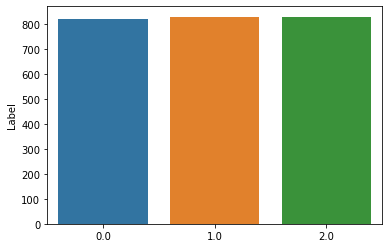

In [23]:
import seaborn as sns
sns.barplot(df['Label'].value_counts().index,df['Label'].value_counts())

In [24]:
x=df.drop(['Label'],axis=1)
y=df['Label'].values

In [25]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train,y_train=scaler.fit_transform(x_train),scaler.fit_transform(y_train)

In [27]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,x_test)

RandomForestClassifier()

In [28]:
model.score(x_train,x_test)

1.0

In [29]:
model.score(y_train,y_test)

0.9455645161290323

In [35]:
from sklearn import metrics
print(metrics.classification_report(y_test,model.predict(y_train)))

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95       167
         1.0       0.92      0.94      0.93       186
         2.0       0.92      1.00      0.96       143

    accuracy                           0.95       496
   macro avg       0.95      0.95      0.95       496
weighted avg       0.95      0.95      0.95       496



In [ ]:
metrics.confusion_matrix(y_test,model.predict(y_train))

In [16]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
pca_x=pca.fit_transform(x)

In [17]:
pca.explained_variance_ratio_

array([0.179819  , 0.07574186, 0.03782463, 0.02627351, 0.02194462,
       0.02034495, 0.01913849, 0.01778055, 0.01601957, 0.01519633,
       0.01288371, 0.01248686, 0.01177672, 0.01125442, 0.01027031,
       0.00988379, 0.00901273, 0.00829661, 0.00778194, 0.00732077,
       0.00684065, 0.00634698, 0.00628107, 0.0060452 , 0.00592076,
       0.00557238, 0.00521122, 0.00497166, 0.00479922, 0.00464172,
       0.00437931, 0.00400093, 0.00385606, 0.00352206, 0.00333939,
       0.00327287, 0.00311339, 0.00307454, 0.00302128, 0.0027591 ,
       0.00260098, 0.00254332, 0.00252584, 0.00248786, 0.00243901,
       0.0023923 , 0.00229614, 0.00216012, 0.00214474, 0.00208955,
       0.00206961, 0.00201419, 0.00198174, 0.00190339, 0.00188598,
       0.0018333 , 0.00180059, 0.00174974, 0.00172139, 0.00170811,
       0.00167861, 0.00163081, 0.00160671, 0.00159892, 0.00158016,
       0.00154508, 0.00154119, 0.0015073 , 0.00148042, 0.00147468,
       0.00146378, 0.00145285, 0.00143307, 0.00141902, 0.00140

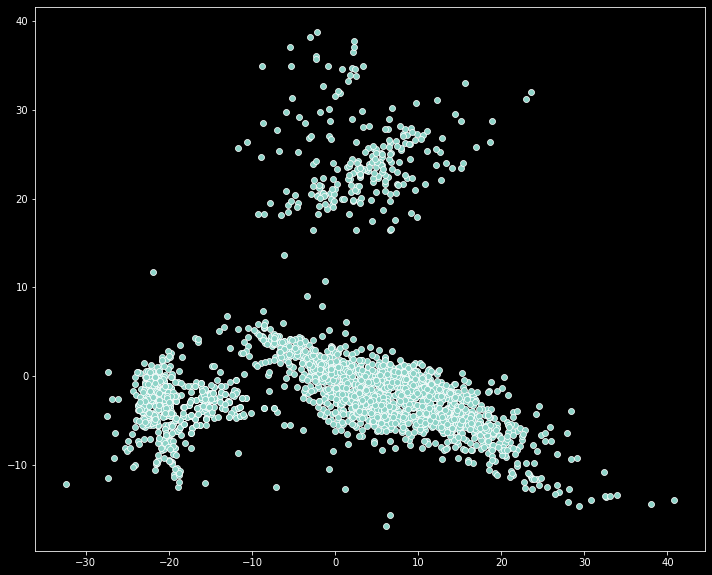

In [33]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.figure(figsize=(12,10))
sns.scatterplot(pca_x[:,0],pca_x[:,1])